## Data Loading and Preprocessing: http://www.2dmatpedia.org/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json

with open('/content/drive/MyDrive/UT/Year 4/CHE 384T/final/db.json', 'r') as f:
    for line in f:
        data = json.loads(line)

In [ ]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/UT/Year 4/CHE 384T/final/db.json', lines=True)
df.head()

,_id,sg_number,formula_pretty,nelements,creation_task_label,created_at,chemsys,material_id,discovery_process,formula_reduced_abc,...,thermo,energy_vdw_per_atom,magnetism,total_magnetization,calc_settings,energy_per_atom,relative_id,decomposition_energy,exfoliation_energy_per_atom,literature_doi
0,{'$oid': '5c135411b183da75a584848a'},164,IrF2,2,mp-30033_sub_round2highcri2-relax,{'$date': '2018-12-14T06:56:17.423Z'},F-Ir,2dm-1,bottom-up,F2 Ir1,...,"{'energy_vdw': -10.08505654, 'energy_vdw_per_a...",-3.361686,{'total_magnetization': 0.24874000000000002},0.248740,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-4.536822,2dm-4963,0.799800,0.234617,NaN
1,{'$oid': '5c135411b183da75a584848b'},164,Ba2Sb,2,mp-1245_sub_round2highcri2-static,{'$date': '2018-12-14T06:56:17.504Z'},Ba-Sb,2dm-2,bottom-up,Ba2 Sb1,...,"{'energy_vdw': -6.56098752, 'energy_vdw_per_at...",-2.186996,{'total_magnetization': 0.7488541},0.748854,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-3.243794,2dm-3279,0.300023,0.210645,NaN
2,{'$oid': '5c135411b183da75a584848c'},2,TlS,2,mp-542812_sub_round2highcri2-relax,{'$date': '2018-12-14T06:56:17.530Z'},S-Tl,2dm-3,bottom-up,S1 Tl1,...,"{'energy_vdw': -26.77720289, 'energy_vdw_per_a...",-2.231434,{'total_magnetization': -0.0},-0.000000,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-3.325673,2dm-5155,0.177412,0.095794,NaN
3,{'$oid': '5c135411b183da75a584848d'},166,MoCl2,2,mp-554340_sub_round2highcri2-static,{'$date': '2018-12-14T06:56:17.557Z'},Cl-Mo,2dm-4,bottom-up,Cl2 Mo1,...,"{'energy_vdw': -26.81824534, 'energy_vdw_per_a...",-4.469708,{'total_magnetization': 0.0},0.000000,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-5.294281,2dm-4342,0.485815,-0.055818,NaN
4,{'$oid': '5c135411b183da75a584848e'},164,IrO2,2,mvc-12841_sub_round2highcri2-static,{'$date': '2018-12-14T06:56:17.574Z'},Ir-O,2dm-6367,bottom-up,Ir1 O2,...,"{'energy_vdw': -17.50786697, 'energy_vdw_per_a...",-5.835956,{'total_magnetization': 0.0887066},0.088707,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-6.799664,2dm-4272,0.237090,NaN,NaN


In [ ]:
df1 = df[['formula_pretty', 'bandgap']]
df = df1.rename(columns={'formula_pretty':'formula'})
df.head()

,formula,bandgap
0,IrF2,0.0000
1,Ba2Sb,0.0000
2,TlS,0.9814
3,MoCl2,0.0000
4,IrO2,0.0000


Data Exploration

In [ ]:
print(df.shape)
print(df.columns)

(6351, 2)
Index(['formula', 'bandgap'], dtype='object')


In [ ]:
df.describe()

,bandgap
count,6351.000000
mean,1.048038
std,1.443890
min,0.000000
25%,0.000000
50%,0.221500
75%,1.822050
max,9.449400


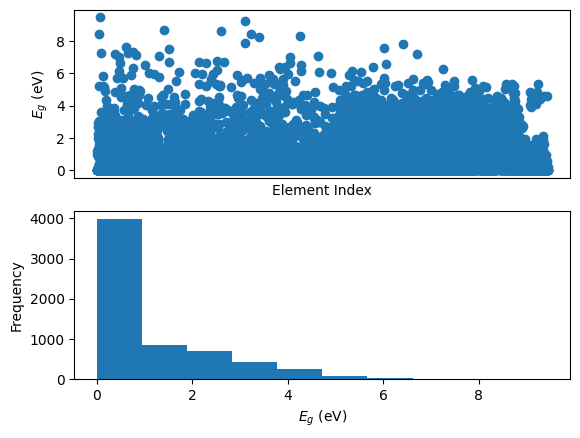

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, df.shape[0], df.shape[0])
y = df['bandgap']

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(x, y)
ax1.set_ylabel('$E_{g}$ (eV)')
ax1.set_xlabel('Element Index')
ax1.set_xticks([])

ax2.hist(y)
ax2.set_ylabel('Frequency')
ax2.set_xlabel('$E_{g}$ (eV)')

plt.show()

## Adding Elemental and Compositional Descriptors to Dataset

In [ ]:
! pip install matminer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 35.6 MB/s eta 0:00:00


In [ ]:
from matminer.featurizers.conversions import StrToComposition
df = StrToComposition().featurize_dataframe(df, "formula")
df.head()

StrToComposition:   0%|          | 0/6351 [00:00<?, ?it/s]

,formula,bandgap,composition
0,IrF2,0.0000,"(Ir, F)"
1,Ba2Sb,0.0000,"(Ba, Sb)"
2,TlS,0.9814,"(Tl, S)"
3,MoCl2,0.0000,"(Mo, Cl)"
4,IrO2,0.0000,"(Ir, O)"


In [ ]:
from matminer.featurizers.composition import ElementProperty

ep_feat = ElementProperty.from_preset(preset_name="magpie", impute_nan=True)
df = ep_feat.featurize_dataframe(df, col_id="composition")
df.head()

ElementProperty:   0%|          | 0/6351 [00:00<?, ?it/s]

,formula,bandgap,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,IrF2,0.0000,"(Ir, F)",9.0,77.0,68.0,31.666667,30.222222,9.0,60.0,...,0.0,0.0,0.0,0.0,15.0,225.0,210.0,85.0,93.333333,15.0
1,Ba2Sb,0.0000,"(Ba, Sb)",51.0,56.0,5.0,54.333333,2.222222,56.0,9.0,...,0.0,0.0,0.0,0.0,166.0,229.0,63.0,208.0,28.000000,229.0
2,TlS,0.9814,"(Tl, S)",16.0,81.0,65.0,48.500000,32.500000,16.0,76.0,...,0.0,0.0,0.0,0.0,70.0,194.0,124.0,132.0,62.000000,70.0
3,MoCl2,0.0000,"(Mo, Cl)",17.0,42.0,25.0,25.333333,11.111111,17.0,50.0,...,0.0,0.0,0.0,0.0,64.0,229.0,165.0,119.0,73.333333,64.0
4,IrO2,0.0000,"(Ir, O)",8.0,77.0,69.0,31.000000,30.666667,8.0,60.0,...,0.0,0.0,0.0,0.0,12.0,225.0,213.0,83.0,94.666667,12.0


In [ ]:
from matminer.featurizers.conversions import CompositionToOxidComposition
from matminer.featurizers.composition import OxidationStates

df = CompositionToOxidComposition().featurize_dataframe(df, "composition")

os_feat = OxidationStates()
df = os_feat.featurize_dataframe(df, "composition_oxid")
df.head()

CompositionToOxidComposition:   0%|          | 0/6351 [00:00<?, ?it/s]

Process ForkPoolWorker-1381:
Process ForkPoolWorker-1382:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/matminer/featurizers/base.py", line 505, in featurize_wrapper
    return self.featurize(*x)
  File "/usr/local/lib/python3.10/dist-packages/matminer/featurizers/base.py", line 505, in featurize_wrapper
    return self.featurize(*x)
  File "/usr/local/lib/python3.10/dist-packages/matminer/featurizers/conversions.py", line 526, in featurize
    comp = comp.add_charges_from_oxi_state_guesses(**self.oxi_guess_params)
  File "/usr/local/lib/python3.10/dist-packages/matminer/featurizers/conversions.py", line 526, in featurize
    comp = comp.add_charges_from_oxi_state_guesses(**self.oxi_guess_params)
  File "/usr/local/lib/python3.10/dist-packages/pymatgen/core/composition.py", line 881, in add_charges_from_oxi_state_guesses
    _, oxidation_states = self._get_oxi_state_guesses(all_oxi_states, max_sites, oxi_states_ove

KeyboardInterrupt: 

In [ ]:
y = df['bandgap'].values
excluded = ['formula', 'bandgap', 'composition', 'composition_oxid']
X = df.drop(excluded, axis=1)

print(f'{X.shape[1]} elemental and composition based descriptors: ')
print(X.columns.values)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

print(f'R^2 = {lr.score(X, y)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

corr_matrix = X.join(pd.Series(y, name='bandgap')).corr()

threshold = 0.3
corr_with_target = corr_matrix['bandgap'].abs()
filtered_features = corr_with_target[corr_with_target > threshold].index
filtered_corr_matrix = corr_matrix.loc[filtered_features, filtered_features]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Filtered Correlation Matrix of Features and Band Gap')
plt.show()

## Random Forest Regression

Default Hyperparameters

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
rfr = RandomForestRegressor(random_state=13)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print(f'R^2 = {r2_score(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_pred, y_test))}')

Grid search hyperparameter tuning

In [ ]:
'''
from dask_ml.model_selection import GridSearchCV
from sklearnex import patch_sklearn
patch_sklearn()

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_leaf': [1, 5, 10]
}
rfr_cv = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1)

rfr_cv.fit(X_train, y_train)
y_pred = rfr_cv.predict(X_test)

print(f'R^2 = {r2_score(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_pred, y_test))}')
'''

Randomized search hyperparameter tuning

In [ ]:
'''
from dask_ml.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': [1, 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

rfr_cvr = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=300,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
)

rfr_cvr.fit(X_train, y_train)

print(f"Best Parameters: {rfr_cvr.best_params_}")

y_pred = rfr_cvr.predict(X_test)

print(f"R^2 = {r2_score(y_test, y_pred)}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}")
'''

Model Accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

best_params = {'bootstrap': False, 'max_depth': 50, 'max_features': 'sqrt',
               'min_samples_leaf': 1, 'min_samples_split': 11,
               'n_estimators': 341}

rfr = RandomForestRegressor(random_state=13, **best_params)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

print(f'R^2 = {r2_score(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')


In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Support Vector Machine Regression

Default Hyperparameters

In [ ]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

In [ ]:
'''
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_trains = scaler.fit_transform(X_train)
X_tests = scaler.transform(X_test)

svr = SVR()
svr.fit(X_trains, y_train)

y_pred = svr.predict(X_tests)

print(f'R^2 = {r2_score(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_pred, y_test))}')
'''

Grid search hyperparameter tuning

In [ ]:
'''
from cuml.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1],
    'kernel': ['rbf'],
    'gamma': ['scale', 0.01, 0.1]
}


svr = SVR()

svr_cv = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

svr_cv.fit(X_trains, y_train)

y_pred = svr_cv.predict(X_tests)

print(f'R^2 = {r2_score(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_pred, y_test))}')
'''

In [ ]:
'''
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.001, 0.01, 0.1, 1.0],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}
svr_cvr = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_grid,
    n_iter=50,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
)

svr_cvr.fit(X_trains, y_train)

print(f"Best parameters: {svr_cvr.best_params_}")

y_pred = svr_cvr.predict(X_tests)

print(f'R^2 = {r2_score(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_pred, y_test))}')
'''

In [ ]:
'''
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'epsilon': [0.001, 0.01, 0.1, 1.0],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]
}
svr_cvr = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_grid,
    n_iter=200,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
)

svr_cvr.fit(X_trains, y_train)

print(f"Best parameters: {svr_cvr.best_params_}")

y_pred = svr_cvr.predict(X_tests)

print(f'R^2 = {r2_score(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_pred, y_test))}')
'''

In [ ]:
best_params = {'kernel': 'rbf',
               'gamma': 0.01,
               'epsilon': 0.1,
               'C': 10}

svr = SVR(**best_params)
svr.fit(X_trains, y_train)

y_pred = rfr.predict(X_tests)

print(f'R^2 = {r2_score(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')